# Part-1 Data Preprocessing

# 1) Loading the data

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [286]:
df=pd.read_csv("Linear_Regression_Pr.csv")

In [287]:
df.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [288]:
df.corr()

,test_score(out of 10),interview_score(out of 10),salary($)
test_score(out of 10),1.000000,0.143066,-0.003004
interview_score(out of 10),0.143066,1.000000,0.037820
salary($),-0.003004,0.037820,1.000000


# 2)replaceing null values of experience with 0


In [289]:
df['experience'].replace(np.NaN,0,inplace=True)

In [6]:
df.shape


(8, 4)

In [278]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [290]:
df.isnull().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

# 3)Replacing the Null values of the column test scorewith mean value 

In [327]:
mn1=df['test_score(out of 10)'].mean()

In [328]:
mn1

7.857142857142857

In [329]:

df['test_score(out of 10)'].replace(np.NaN,mn1,inplace=True)

In [331]:
df.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


# 4)Display a scatter plot between experience and Salary

## as the given salary is in character format, we have to change it to numbers

## wordtodigits library helps in creating numbers from written numbers in character

In [62]:
!pip install wordtodigits

In [204]:
import wordtodigits as wd

In [141]:
from word2number import w2n

## simply adding the values from the experience column to an object

In [291]:

w=df['experience']

In [292]:
w

0         0
1         0
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

## now, it should be converted to string, as the wordtodigits only takes string as an input

In [293]:
w=w.to_string()

## using wordtodigit's convert function to convert numbers written in characters to numbers in int

In [294]:
w=wd.convert(w)

## splitting the output using .split

In [295]:
w=w.split(' ')

## the output contains the index numbers of the data which is no use for us

In [296]:
w

['0',
 '0',
 '1',
 '0',
 '2',
 '5',
 '3',
 '2',
 '4',
 '7',
 '5',
 '3',
 '6',
 '10',
 '7',
 '11']

## selecting only the data and removing index which is not needed

In [297]:
w=w[1:17:2]

## final results

In [298]:
w

['0', '0', '5', '2', '7', '3', '10', '11']

## adding this new converted data to the dataframe

In [299]:
df['experience']=pd.Series(w)

In [304]:
df['experience']=df['experience'].astype(int)

In [305]:
df.dtypes

experience                      int32
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [306]:
df.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


<AxesSubplot:xlabel='experience', ylabel='salary($)'>

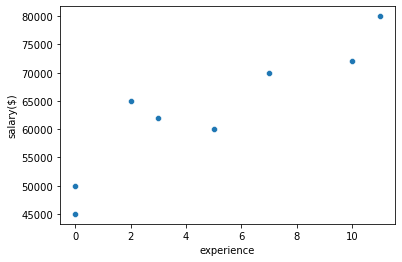

In [307]:
sns.scatterplot(x=df['experience'],y=df['salary($)'])

# 5)Display a scatter plot between test scoreand Salary 

<AxesSubplot:xlabel='test_score(out of 10)', ylabel='salary($)'>

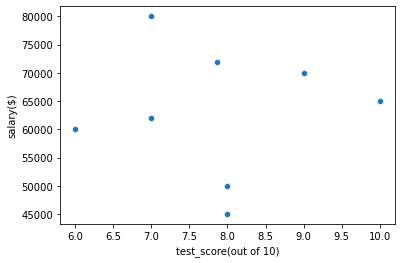

In [332]:
sns.scatterplot(x=df['test_score(out of 10)'],y=df['salary($)'])

# 6)Display a scatter plot between interview scoreand Salary 

<AxesSubplot:xlabel='interview_score(out of 10)', ylabel='salary($)'>

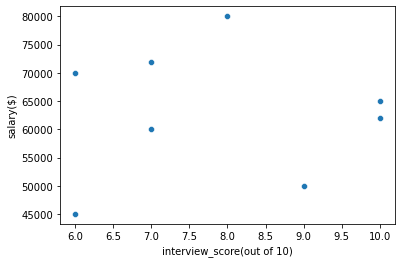

In [309]:
sns.scatterplot(x=df['interview_score(out of 10)'],y=df['salary($)'])

# 7)Display bar plot for experience

<AxesSubplot:xlabel='experience', ylabel='salary($)'>

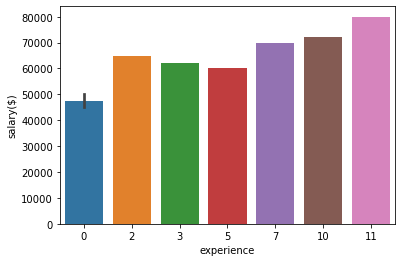

In [310]:
sns.barplot(x=df['experience'],y=df['salary($)'])

# Part-2
## working with the model

#  1)Separate feature data from target data

In [334]:
y=df[['salary($)']]

In [350]:
x=df[['experience']]

In [351]:
x

,experience
0,0
1,0
2,5
3,2
4,7
5,3
6,10
7,11


In [352]:
y

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


# 2)Create a Linear regression model between Features and target data

In [366]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [367]:
X_train

,experience
4,7
6,10
3,2
1,0
0,0
2,5


In [368]:
X_test

,experience
5,3
7,11


In [369]:
Y_train

,salary($)
4,70000
6,72000
3,65000
1,45000
0,50000
2,60000


In [371]:
regression_model=LinearRegression()

In [372]:

regression_model.fit(X_train,Y_train)

LinearRegression()

In [373]:
X_test

,experience
5,3
7,11


In [374]:
predicted_salary=regression_model.predict(X_test)

In [375]:
predicted_salary

array([[57991.8699187 ],
       [76723.57723577]])

In [376]:
Y_test

,salary($)
5,62000
7,80000


# 3)Display the test score and training score 

In [378]:
regression_model.score(X_test,Y_test)

0.8345675748235954

In [379]:
regression_model.score(X_train,Y_train)

0.7576870375445328

# 4)Extract slope and intercept value from the model

In [388]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [381]:
mse=mean_squared_error(Y_test,predicted_salary)

In [389]:
mae=mean_absolute_error(Y_test,predicted_salary)

In [384]:
r2=r2_score(Y_test,predicted_salary)

In [393]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 

Slope: [[2341.46341463]]
Intercept: [50967.4796748]


# 5)Display Mean Squared Error

In [387]:
print('Mean squared error: ', mse)

Mean squared error:  13400026.439288769


# 6)Display Mean Absolute Error 

In [390]:
print('Mean Absolute Error',mae )

Mean Absolute Error 3642.2764227642256


# 7)Display Root mean Squared error

In [391]:
print('Root mean squared error: ',np.sqrt(mse)) 

Root mean squared error:  3660.604654874488


# 8)Display R2 score

In [392]:
print('R2 score: ', r2)

R2 score:  0.8345675748235954
